In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk

In [3]:
from wordcloud import WordCloud

In [4]:
train_df1 = pd.read_csv(r'/Users/vishalverma/Vishal/Kaggle/NLP on Tweets/Data/train.csv')
test_df1 = pd.read_csv(r'/Users/vishalverma/Vishal/Kaggle/NLP on Tweets/Data/test.csv')
sample_sub1 = pd.read_csv(r'/Users/vishalverma/Vishal/Kaggle/NLP on Tweets/Data/sample_submission.csv')

In [5]:
train_df1.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
train_df1.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [8]:
train_df1.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [9]:
train_df2 = train_df1.drop('id',axis = 1)

In [10]:
#train_df2 = train_df1[['text','target']]

In [11]:
train_df2

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,NaN,NaN,Police investigating after an e-bike collided ...,1


# EDA

<AxesSubplot:>

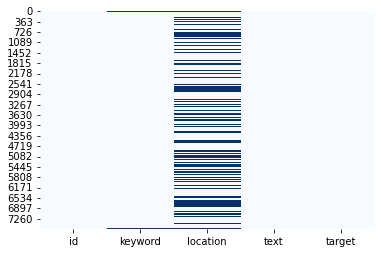

In [12]:
sns.heatmap(train_df1.isnull(),
           cbar = False,
           cmap = "Blues")

In [13]:
(train_df1.isnull().sum()/train_df1.shape[0])*100

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

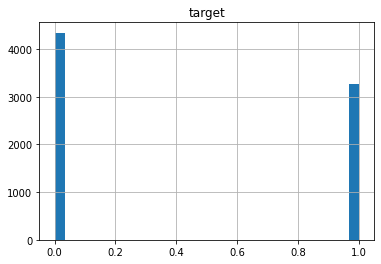

In [14]:
train_df2.hist(bins = 30)

/Users/vishalverma/miniconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

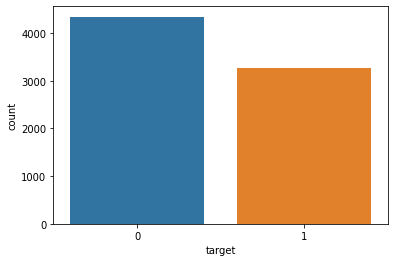

In [15]:
sns.countplot(train_df2.target)

Add length of tweet

In [16]:
train_df2['length'] = train_df2.text.apply(len)

In [17]:
train_df2.head(5)

,keyword,location,text,target,length
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [18]:
train_df2.describe()

,target,length
count,7613.00000,7613.000000
mean,0.42966,101.037436
std,0.49506,33.781325
min,0.00000,7.000000
25%,0.00000,78.000000
50%,0.00000,107.000000
75%,1.00000,133.000000
max,1.00000,157.000000


In [19]:
train_df2[train_df2.length == 7]

,keyword,location,text,target,length
1882,crushed,NaN,Crushed,0,7
4890,massacre,NaN,Bad day,0,7
5115,nuclear%20reactor,NaN,Err:509,0,7


In [20]:
positive_tweet = train_df2[train_df2.target == 0]

In [21]:
negative_tweet = train_df2[train_df2.target == 1]

In [22]:
sentences = train_df2.text.tolist()

In [23]:
len(sentences)

7613

In [24]:
sentences_as_one_string = " ".join(sentences)

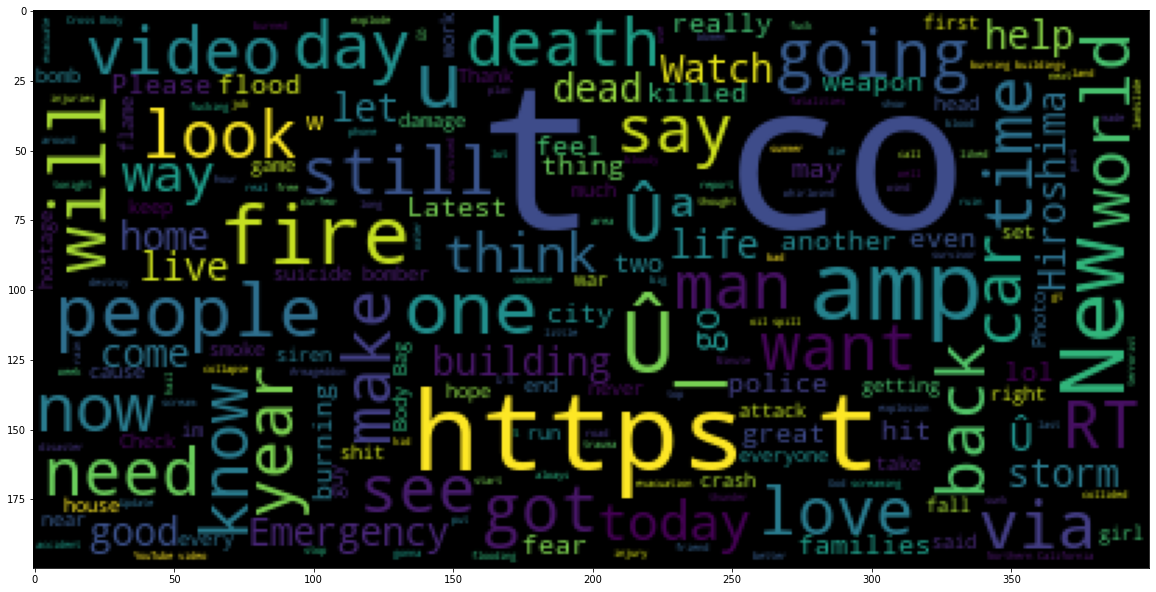

In [25]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [26]:
negative_sentense = negative_tweet.text.tolist()

In [27]:
full_negative_text = " ".join(negative_sentense)

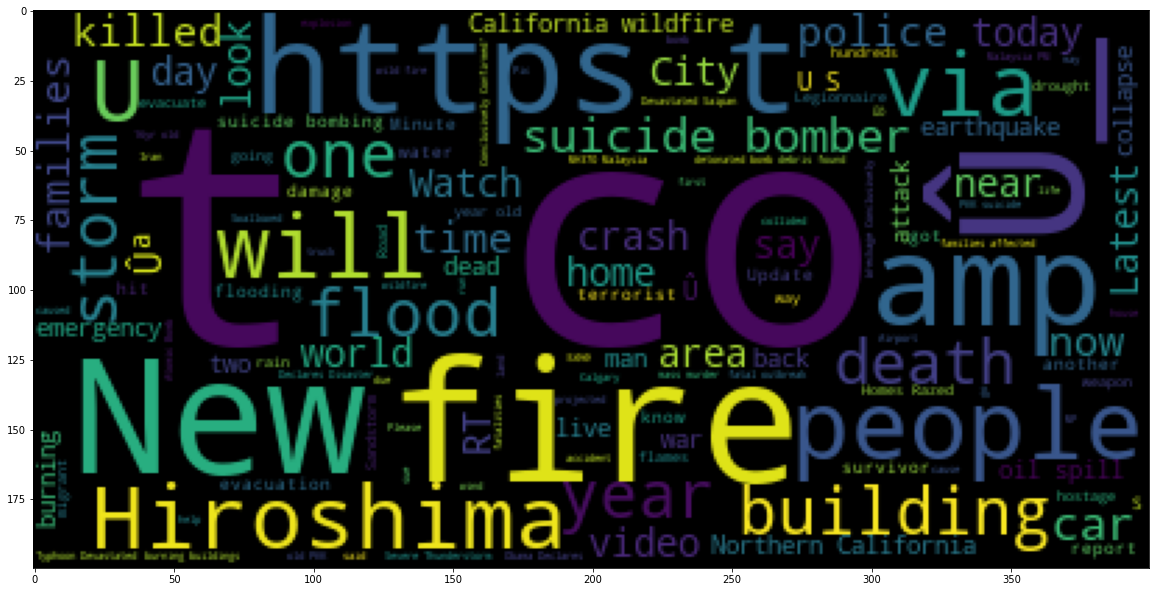

In [28]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(full_negative_text))

# Data Cleaning

Removing Punctuations

In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Example - 1

In [30]:
test1 = '$I will become datascientist one day# !!'

In [31]:
test1

'$I will become datascientist one day# !!'

In [32]:
test1_punc_removed = "".join([char for char in test1 if char not in string.punctuation])

In [33]:
test1_punc_removed

'I will become datascientist one day '

Stop words

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vishalverma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords

In [36]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
exp2 = 'i will become datascientist one day'

In [38]:
cleaned_sentence1 = [i for i in exp2.split() if i.lower() not in stopwords.words('english')]

In [39]:
cleaned_sentence1

['become', 'datascientist', 'one', 'day']

# Remove url

In [73]:
train_df1['type'] = 'train'
test_df1['type'] = 'test'

df1 = pd.concat([train_df1,test_df1],axis = 0).reset_index()


In [88]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
def remove_html(in_str):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', in_str)
def hastag_removed(in_str2):
    hastag_pattern = re.compile('#[A-Za-z0-9_]+')
    return hastag_pattern.sub(r'',in_str2)

url remove check code

In [96]:
print('before : ')
print(df1.loc[10874,'text'])
print('after : ')
print(remove_urls(df1.loc[10874,'text']))

before : 
MEG issues Hazardous Weather Outlook (HWO) http://t.co/3X6RBQJHn3
after : 
MEG issues Hazardous Weather Outlook (HWO) 


hastag remove check

In [97]:
print('before : ')
print(df1.loc[10875,'text'])
print('after : ')
print(hastag_removed(df1.loc[10875,'text']))

before : 
#CityofCalgary has activated its Municipal Emergency Plan. #yycstorm
after : 
 has activated its Municipal Emergency Plan. 


In [91]:
df1["urls_removed"]= df1["text"].apply(lambda x: remove_urls(x))
df1["html_removed"]=df1["urls_removed"].apply(lambda x: remove_html(x))
df1['hastag_removed'] = df1["html_removed"].apply(lambda x: hastag_removed(x))

In [98]:
df1

,index,id,keyword,location,text,target,type,urls_removed,html_removed,hastag_removed
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0,train,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this May ALLAH Fo...
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,train,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0,train,All residents asked to 'shelter in place' are ...,All residents asked to 'shelter in place' are ...,All residents asked to 'shelter in place' are ...
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0,train,"13,000 people receive #wildfires evacuation or...","13,000 people receive #wildfires evacuation or...","13,000 people receive evacuation orders in Ca..."
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0,train,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby as smoke f...
...,...,...,...,...,...,...,...,...,...,...
10871,3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,test,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
10872,3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN,test,Storm in RI worse than last hurricane. My city...,Storm in RI worse than last hurricane. My city...,Storm in RI worse than last hurricane. My city...
10873,3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN,test,Green Line derailment in Chicago,Green Line derailment in Chicago,Green Line derailment in Chicago
10874,3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,test,MEG issues Hazardous Weather Outlook (HWO),MEG issues Hazardous Weather Outlook (HWO),MEG issues Hazardous Weather Outlook (HWO)


Creating a pipeline to remove punctuation

In [100]:
import string
string.punctuation

#nltk.download('stopwords')
from nltk.corpus import stopwords

In [122]:
def cleaning_text(msg1):
    
    ## removing punctuations
    punc_removed = [char for char in msg1 if char not in string.punctuation]
    punc_removed2 = ''.join(punc_removed)
    
    ## remove stop words
    stop_word_removed1 = [word.lower() for word in punc_removed2.split() if word.lower() not in stopwords.words('english')]
    
    stop_word_removed1 = ' '.join(stop_word_removed1)
    
    return stop_word_removed1

In [102]:
df1['cleaned_text'] = df1.hastag_removed.apply(cleaning_text)

In [103]:
df1

,index,id,keyword,location,text,target,type,urls_removed,html_removed,hastag_removed,cleaned_text
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0,train,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this May ALLAH Fo...,deeds reason may allah forgive us
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,train,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0,train,All residents asked to 'shelter in place' are ...,All residents asked to 'shelter in place' are ...,All residents asked to 'shelter in place' are ...,residents asked shelter place notified officer...
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0,train,"13,000 people receive #wildfires evacuation or...","13,000 people receive #wildfires evacuation or...","13,000 people receive evacuation orders in Ca...",13000 people receive evacuation orders california
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0,train,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby as smoke f...,got sent photo ruby smoke pours school
...,...,...,...,...,...,...,...,...,...,...,...
10871,3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,test,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles ûò safety faste...
10872,3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN,test,Storm in RI worse than last hurricane. My city...,Storm in RI worse than last hurricane. My city...,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane cityamp3others h...
10873,3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN,test,Green Line derailment in Chicago,Green Line derailment in Chicago,Green Line derailment in Chicago,green line derailment chicago
10874,3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,test,MEG issues Hazardous Weather Outlook (HWO),MEG issues Hazardous Weather Outlook (HWO),MEG issues Hazardous Weather Outlook (HWO),meg issues hazardous weather outlook hwo


# Lemmanization

In [104]:
from nltk.corpus import wordnet

In [105]:
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

def do_lemmatizing(in_str):
    #new_str=""
    new_str = []
    for word in in_str.split():
        #new_str=new_str + lem.lemmatize(word) + " "
        new_str.append(lem.lemmatize(word))
    
    new_str = ' '.join(new_str)
    return new_str

#train_df["Lemmatized"]=train_df["lowered_stop_freq_rare_removed"].apply(lambda x: do_lemmatizing(x))

In [106]:
df1['cleaned_text2'] = df1.cleaned_text.apply(do_lemmatizing)

In [107]:
df1

,index,id,keyword,location,text,target,type,urls_removed,html_removed,hastag_removed,cleaned_text,cleaned_text2
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0,train,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this May ALLAH Fo...,deeds reason may allah forgive us,deed reason may allah forgive u
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,train,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0,train,All residents asked to 'shelter in place' are ...,All residents asked to 'shelter in place' are ...,All residents asked to 'shelter in place' are ...,residents asked shelter place notified officer...,resident asked shelter place notified officer ...
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0,train,"13,000 people receive #wildfires evacuation or...","13,000 people receive #wildfires evacuation or...","13,000 people receive evacuation orders in Ca...",13000 people receive evacuation orders california,13000 people receive evacuation order california
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0,train,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby as smoke f...,got sent photo ruby smoke pours school,got sent photo ruby smoke pours school
...,...,...,...,...,...,...,...,...,...,...,...,...
10871,3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,test,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles ûò safety faste...,earthquake safety los angeles ûò safety faste...
10872,3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN,test,Storm in RI worse than last hurricane. My city...,Storm in RI worse than last hurricane. My city...,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane cityamp3others h...,storm ri worse last hurricane cityamp3others h...
10873,3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN,test,Green Line derailment in Chicago,Green Line derailment in Chicago,Green Line derailment in Chicago,green line derailment chicago,green line derailment chicago
10874,3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,test,MEG issues Hazardous Weather Outlook (HWO),MEG issues Hazardous Weather Outlook (HWO),MEG issues Hazardous Weather Outlook (HWO),meg issues hazardous weather outlook hwo,meg issue hazardous weather outlook hwo


# Word Cloud

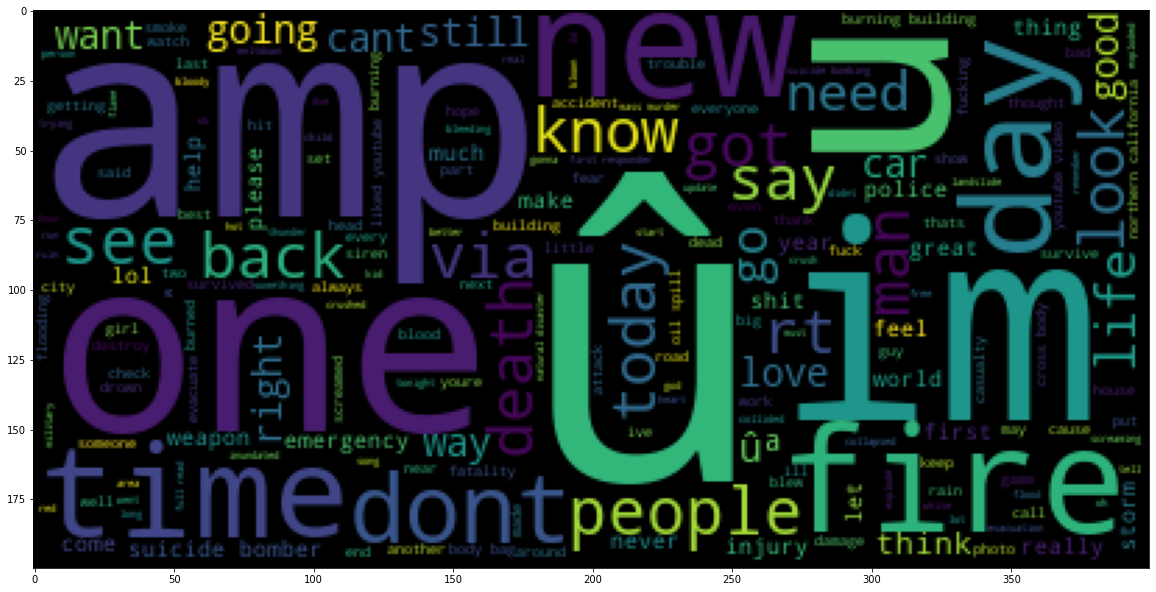

In [133]:
negative_tweet = df1[df1.target == 1]
sentense1 = df1.cleaned_text2.tolist()
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(' '.join(sentense1)))

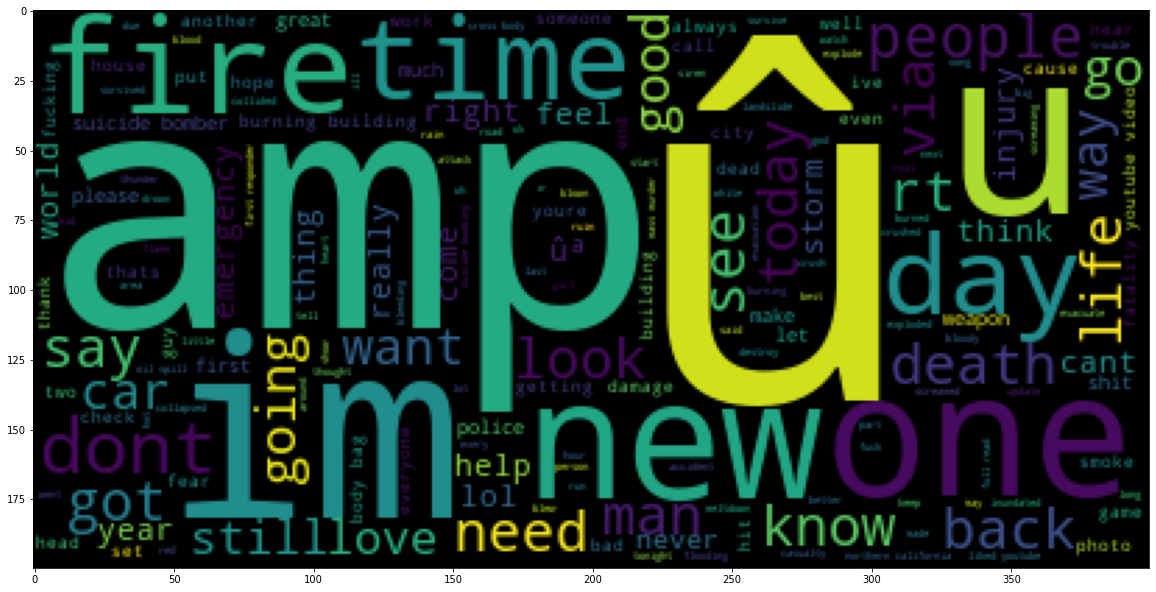

In [134]:
negative_tweet = df1[df1.target == 0]
sentense1 = df1.cleaned_text2.tolist()
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(' '.join(sentense1)))

# Data prep using count vectorizer

In [189]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
vectorizer1 = CountVectorizer()

In [136]:
tweets1_countvec = vectorizer1.fit_transform(df1.cleaned_text2)

In [137]:
x = pd.DataFrame(tweets1_countvec.toarray())

In [138]:
x.columns = vectorizer1.get_feature_names()

/Users/vishalverma/miniconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [142]:
df1.rename(columns = {'type' : 'model_data_type'},inplace = True)

In [149]:
indp1 = pd.DataFrame(df1.model_data_type).merge(x, left_index = True, right_index=True)

In [158]:
train_y = df1[df1.model_data_type == 'train'].target
train_x = indp1[indp1.model_data_type == 'train'].drop('model_data_type',axis = 1)
test_x = indp1[indp1.model_data_type == 'test'].drop('model_data_type',axis = 1)

In [159]:
test_x

,00,0011,001116,0025,005225,010156,010217,010242,0104,010401,...,ûó,ûócategorically,ûóher,ûókaiserjaegers,ûókill,ûókody,ûónegligence,ûótech,ûówe,ûówere
7613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [180]:
train1_y,test1_y,train1_x,test1_x = train_test_split(train_y,train_x,test_size = 0.2)

In [181]:
nb_cls = MultinomialNB()
nb_cls.fit(train1_x,train1_y)
y_predict_test = nb_cls.predict(test1_x)
print(classification_report(test1_y,y_predict_test))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       859
         1.0       0.78      0.71      0.74       664

    accuracy                           0.79      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.79      0.79      0.78      1523



In [190]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(train1_x,train1_y)
    
y_predict_test = model.predict(test1_x)
print(classification_report(test1_y,y_predict_test))

              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       859
         1.0       0.79      0.68      0.73       664

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523



In [185]:
nb_cls.fit(train_x,train_y)
y_predict_test = nb_cls.predict(test_x)
test_df1['target'] = y_predict_test
test_df1[['id','target']].to_csv(r'/Users/vishalverma/Vishal/Kaggle/NLP on Tweets/results/naive_bayes_results.csv',
                                index = False)

In [191]:
model.fit(train_x,train_y)
y_predict_test = model.predict(test_x)
test_df1['target'] = y_predict_test
test_df1[['id','target']].to_csv(r'/Users/vishalverma/Vishal/Kaggle/NLP on Tweets/results/logi_results.csv',
                                index = False)

In [195]:
from sklearn.model_selection import KFold 
from sklearn.metrics import classification_report, confusion_matrix, f1_score
kf = KFold(n_splits = 7)
output1 = []

for train_index, test_index in kf.split(train_x):
    X_train, X_test = train_x.iloc[train_index,:], train_x.iloc[test_index,:]
    y_train, y_test = train_y[train_index], train_y[test_index]
    
    model = LogisticRegression(solver='liblinear', random_state=0)
    model.fit(X_train,y_train)
    
    pred1 = model.predict(X_test)
    
    output1.append(f1_score(y_test,pred1))
    
print(np.mean(output1))

0.6432158745037263


In [196]:
output1

[0.6146010186757215,
 0.6674033149171271,
 0.6227848101265824,
 0.6710526315789473,
 0.5714285714285714,
 0.6254826254826255,
 0.729758149316509]

In [197]:
test_x

,00,0011,001116,0025,005225,010156,010217,010242,0104,010401,...,ûó,ûócategorically,ûóher,ûókaiserjaegers,ûókill,ûókody,ûónegligence,ûótech,ûówe,ûówere
7613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
